In [5]:
print("shivam here")
!pip install python-dotenv


shivam here

[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [1]:
from dotenv import load_dotenv
import os

# Load the .env file
load_dotenv()

True

# Config the Model 

In [2]:
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [3]:

from langchain_google_genai import GoogleGenerativeAI
model = GoogleGenerativeAI(
    model="gemini-1.5-flash",
    temperature=0.2,
    google_api_key=GEMINI_API_KEY,
    max_output_tokens=1024,)
response = model.invoke("hello gemini")
print(response)


Hello there! How can I help you today?


# Config the embedding model

In [12]:
from langchain_huggingface import HuggingFaceEmbeddings
model_name = "BAAI/bge-small-en"
embeddings = HuggingFaceEmbeddings(
    model_name=model_name)
len(embeddings.embed_query("hello world"))  # [768]

384

In [5]:
%pip install -qU pypdf

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Lets store the data in vector DB 

In [6]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import PyPDFLoader

loader = DirectoryLoader("/Users/shivamkumar/Documents/Krish-Naik-Course-Agentic AI/agentic-ai-course/data/colbert.pdf", glob="**/*.pdf", loader_cls=PyPDFLoader)
# loader = TextLoader("data/colbert.pdf")
loader = PyPDFLoader("/Users/shivamkumar/Documents/Krish-Naik-Course-Agentic AI/agentic-ai-course/data/colbert.pdf")
documents = loader.load()


In [7]:

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
texts = text_splitter.split_documents(documents)
print(f"Loaded {len(texts)} documents")

Loaded 78 documents


In [8]:
documents

[Document(metadata={'producer': 'macOS Version 13.5 (Build 22G74) Quartz PDFContext, AppendMode 1.1', 'creator': 'LaTeX with hyperref package', 'creationdate': "D:20200605003220Z00'00'", 'author': 'Omar Khattab and Matei Zaharia', 'subject': '', 'trapped': '/False', 'title': 'ColBERT: Efficient and Effective Passage Search via Contextualized Late Interaction over BERT', 'moddate': "D:20241127020339Z00'00'", 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) kpathsea version 6.2.2', 'keywords': '', 'source': '/Users/shivamkumar/Documents/Krish-Naik-Course-Agentic AI/agentic-ai-course/data/colbert.pdf', 'total_pages': 10, 'page': 0, 'page_label': '1'}, page_content='ColBERT: Eﬀicient and Eﬀective Passage Search via\nContextualized Late Interaction over BERT\nOmar Kha/t_tab\nStanford University\nokha/t_tab@stanford.edu\nMatei Zaharia\nStanford University\nmatei@cs.stanford.edu\nABSTRACT\nRecent progress in Natural Language Understanding (NLU) is driv-\ning 

In [9]:
documents[0].page_content


'ColBERT: Eﬀicient and Eﬀective Passage Search via\nContextualized Late Interaction over BERT\nOmar Kha/t_tab\nStanford University\nokha/t_tab@stanford.edu\nMatei Zaharia\nStanford University\nmatei@cs.stanford.edu\nABSTRACT\nRecent progress in Natural Language Understanding (NLU) is driv-\ning fast-paced advances in Information Retrieval (IR), largely owed\nto /f_ine-tuning deep language models (LMs) for document ranking.\nWhile remarkably eﬀective, the ranking models based on these LMs\nincrease computational cost by orders of magnitude over prior ap-\nproaches, particularly as they must feed each query–document pair\nthrough a massive neural network to compute a single relevance\nscore. To tackle this, we present ColBERT, a novel ranking model\nthat adapts deep LMs (in particular, BERT) for eﬃcient retrieval.\nColBERT introduces a late interactionarchitecture that indepen-\ndently encodes the query and the document using BERT and then\nemploys a cheap yet powerful interaction step t

In [10]:
doc_string=[doc.page_content for doc in documents]


In [11]:
len(doc_string)


10

In [14]:
%pip install chromadb

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 1.3 MB/s eta 0:00:0000:0100:01m
  Using cached build-1.2.2.post1-py3-none-any.whl (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 607.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.4/103.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 1.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Using cached PyPika-0.48.9-py2.py3-none-any.whl
  Using cached overrides-7.7.0-py3-none-any.whl (17 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.0/499.0 kB 1.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.1 MB/s e

In [15]:
# create vector store for the documents and generate embeddings
db=Chroma.from_documents(documents,embeddings)


In [18]:
retriever = db.as_retriever(search_kwargs={"k": 3})

docs = retriever.invoke("Late Interaction")
docs

[Document(metadata={'title': 'ColBERT: Efficient and Effective Passage Search via Contextualized Late Interaction over BERT', 'page_label': '2', 'moddate': "D:20241127020339Z00'00'", 'total_pages': 10, 'subject': '', 'creationdate': "D:20200605003220Z00'00'", 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) kpathsea version 6.2.2', 'producer': 'macOS Version 13.5 (Build 22G74) Quartz PDFContext, AppendMode 1.1', 'trapped': '/False', 'author': 'Omar Khattab and Matei Zaharia', 'keywords': '', 'source': '/Users/shivamkumar/Documents/Krish-Naik-Course-Agentic AI/agentic-ai-course/data/colbert.pdf', 'creator': 'LaTeX with hyperref package', 'page': 1}, page_content='QueryDocument\nMaxSim∑MaxSimMaxSimsQueryCNN  /  Match KernelsCNN  /  Match Kernels / MLPMLPs\nDocument(c) All-to-all Interaction(e.g., BERT)(b) Query-Document Interaction(e.g., DRMM, KNRM, Conv-KNRM)(d) Late Interaction(i.e., the proposed ColBERT)(a) Representation-based Similarity(e.g., DSSM, 

In [19]:
# Creation of Pydantic Class 

# Till now we have created llm, embedding model, document loader, text splitter and vector store.
# Now we will create a pydantic class to define the schema of the input and output




# Creation of Pydantic class for output parsing 

In [20]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [21]:
# a) Representation-based Similarity
# (e.g., DSSM, SNRM)
# Query
# (b) Query-Document Interaction
# (e.g., DRMM, KNRM, Conv-KNRM)
# Query Document
# (c) All-to-all Interaction
# (e.g., BERT)
# Query Document
# (d) Late Interaction
# (i.e., the proposed ColBERT)
class RetrievalTechnique(BaseModel):
    technique: str = Field(description="The technique used for retrieval, e.g., 'Late Interaction', 'respresentation based similarity'.")
    reasoning: str = Field(description="The reasoning behind the choice of retrieval technique, e.g., 'Late Interaction is chosen because it allows for efficient retrieval of relevant documents while maintaining high accuracy.'")



In [22]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=RetrievalTechnique)

In [23]:
parser.get_format_instructions()


'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"technique": {"description": "The technique used for retrieval, e.g., \'Late Interaction\', \'respresentation based similarity\'.", "title": "Technique", "type": "string"}, "reasoning": {"description": "The reasoning behind the choice of retrieval technique, e.g., \'Late Interaction is chosen because it allows for efficient retrieval of relevant documents while maintaining high accuracy.\'", "title": "Reasoning", "type": "string"}}, "required": ["technique", "reasoning"]}\n```'

# Langgraph AgentState Initialization 

In [40]:
AgentState={}
AgentState["messages"] = []

In [41]:
AgentState["messages"].append("What is the retrieval technique used in ColBERT?")

In [42]:
AgentState

{'messages': ['What is the retrieval technique used in ColBERT?']}

In [43]:
AgentState["messages"].append("Late interaction is a retrieval technique that allows for efficient retrieval of relevant documents while maintaining high accuracy.")

In [44]:
AgentState

{'messages': ['What is the retrieval technique used in ColBERT?',
  'Late interaction is a retrieval technique that allows for efficient retrieval of relevant documents while maintaining high accuracy.']}

In [45]:
AgentState["messages"][-1]

'Late interaction is a retrieval technique that allows for efficient retrieval of relevant documents while maintaining high accuracy.'

# AgentState inside the state graph

In [85]:
class AgentState(TypedDict):
    messages : Annotated[Sequence[BaseMessage], operator.add]

In [86]:
AgentState

__main__.AgentState

In [90]:
class Response(BaseModel):
    topic: str = Field(description="The classification topic.")
    reasoning: str = Field(description="The reasoning behind the classification")

from langchain_core.output_parsers import JsonOutputParser
parser = JsonOutputParser(pydantic_object=Response)

In [ ]:
def func1(state: AgentState):
    question = state["messages"][-1]
 
    template = """
Your task is to classify the question into one of the following categories:
[Sports, Entertainment, Politics, Technology, Health, Education, Business, Science, Environment, Travel, Food, Fashion, Art, History, Literature, Music, Movies, Television, Gaming, Automotive]

Note: If the question is not related to any of the above categories, classify it as 'Other'.

{format_instructions}

Question: {question}
"""

    prompt = PromptTemplate(
        input_variables=["question"],
        template=template,
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )

    chain = prompt | model | parser
    response = chain.invoke({"question": question})
    print(response)
    
    # state["classification"] = response
    return state

In [ ]:
state = {
    "messages": ["What is the GDP of India?"]
}

func1(state)


{'category': 'Business'}


{'category': 'Business'}

In [94]:
state = {
    "messages": ["Chemicals and masala used for making biryani?"]
}

func1(state)


{'category': 'Food'}


{'category': 'Food'}

In [49]:
def func2(state: AgentState):
    pass

In [50]:
def func3(state: AgentState):
    pass

In [51]:
def router(state: AgentState):
    pass

# Creation of StateGraph

In [58]:
from langgraph.graph import StateGraph, END

In [59]:
workflow = StateGraph(AgentState) 

In [60]:
workflow.add_node("Supervisior", func1)
workflow.add_node("LLM", func2)
workflow.add_node("RAG", func3)

In [61]:
workflow.set_entry_point("Supervisior")


In [62]:
# conditional edges, node1 name , function which will be called, and the end node name 
# so router should return the name of next node to  be called

workflow.add_conditional_edges(
    "Supervisior", router , {"LLM_Call" : "LLM" , "RAG_Call" : "RAG"})

In [63]:
workflow.add_edge("LLM", END)
workflow.add_edge("RAG", END)

In [66]:
app = workflow.compile()



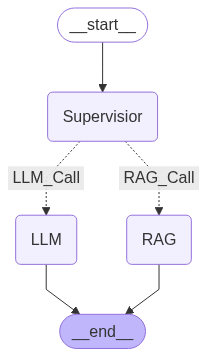

In [68]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))